In [1]:
import os    
#os.environ['THEANO_FLAGS'] = "device=gpu1"  
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32,lib.cnmem=1"
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32"
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu,floatX=float32"
import theano
import numpy as np
from keras.datasets import cifar10

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.optimizers import *
from keras.utils.np_utils import *
from keras.regularizers import l2, activity_l2

from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline



Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)
Using Theano backend.


In [2]:
# fix random seed for reproducibility
seed = 9
np.random.seed(seed)

In [3]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
print (X_train[0])

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
print (mean_image)
print (X_train[0])

In [4]:
print (X_train[0])

[[[ 59  43  50 ..., 158 152 148]
  [ 16   0  18 ..., 123 119 122]
  [ 25  16  49 ..., 118 120 109]
  ..., 
  [208 201 198 ..., 160  56  53]
  [180 173 186 ..., 184  97  83]
  [177 168 179 ..., 216 151 123]]

 [[ 62  46  48 ..., 132 125 124]
  [ 20   0   8 ...,  88  83  87]
  [ 24   7  27 ...,  84  84  73]
  ..., 
  [170 153 161 ..., 133  31  34]
  [139 123 144 ..., 148  62  53]
  [144 129 142 ..., 184 118  92]]

 [[ 63  45  43 ..., 108 102 103]
  [ 20   0   0 ...,  55  50  57]
  [ 21   0   8 ...,  50  50  42]
  ..., 
  [ 96  34  26 ...,  70   7  20]
  [ 96  42  30 ...,  94  34  34]
  [116  94  87 ..., 140  84  72]]]


In [4]:
x_train = X_train.astype('float32') / 255.
x_test = X_test.astype('float32') / 255.
#x_train = X_train.astype('float32') / 1.
#x_test = X_test.astype('float32') / 1.
print (x_train[0])


[[[ 0.23137255  0.16862746  0.19607843 ...,  0.61960787  0.59607846
    0.58039218]
  [ 0.0627451   0.          0.07058824 ...,  0.48235294  0.46666667
    0.47843137]
  [ 0.09803922  0.0627451   0.19215687 ...,  0.4627451   0.47058824
    0.42745098]
  ..., 
  [ 0.81568629  0.78823531  0.7764706  ...,  0.627451    0.21960784
    0.20784314]
  [ 0.70588237  0.67843139  0.72941178 ...,  0.72156864  0.38039216
    0.32549021]
  [ 0.69411767  0.65882355  0.7019608  ...,  0.84705883  0.59215689
    0.48235294]]

 [[ 0.24313726  0.18039216  0.1882353  ...,  0.51764709  0.49019608
    0.48627451]
  [ 0.07843138  0.          0.03137255 ...,  0.34509805  0.32549021
    0.34117648]
  [ 0.09411765  0.02745098  0.10588235 ...,  0.32941177  0.32941177
    0.28627452]
  ..., 
  [ 0.66666669  0.60000002  0.63137257 ...,  0.52156866  0.12156863
    0.13333334]
  [ 0.54509807  0.48235294  0.56470591 ...,  0.58039218  0.24313726
    0.20784314]
  [ 0.56470591  0.50588238  0.55686277 ...,  0.72156864  0

In [11]:
label_train, label_valid = train_test_split(y_train, test_size=0.1)
print (label_train.shape)
print (label_valid.shape)

label_train=to_categorical(label_train)
label_valid=to_categorical(label_valid)

print (label_train.shape)
print (label_valid.shape)
print (label_train)

(45000, 1)
(5000, 1)
(45000, 10)
(5000, 10)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

In [21]:
# Normalize the data: subtract the mean image
mean_image = np.mean(x_train, axis=0)
x_train -= mean_image
x_test -= mean_image


In [22]:
x_train /= np.std(x_train, axis = 0) # normalize
x_train /= np.std(x_train, axis = 0) # normalize



print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
print (mean_image)
print (X_train[0])

In [46]:
print (x_train[0])


[[[ 0.23137255  0.16862746  0.19607843 ...,  0.61960787  0.59607846
    0.58039218]
  [ 0.0627451   0.          0.07058824 ...,  0.48235294  0.46666667
    0.47843137]
  [ 0.09803922  0.0627451   0.19215687 ...,  0.4627451   0.47058824
    0.42745098]
  ..., 
  [ 0.81568629  0.78823531  0.7764706  ...,  0.627451    0.21960784
    0.20784314]
  [ 0.70588237  0.67843139  0.72941178 ...,  0.72156864  0.38039216
    0.32549021]
  [ 0.69411767  0.65882355  0.7019608  ...,  0.84705883  0.59215689
    0.48235294]]

 [[ 0.24313726  0.18039216  0.1882353  ...,  0.51764709  0.49019608
    0.48627451]
  [ 0.07843138  0.          0.03137255 ...,  0.34509805  0.32549021
    0.34117648]
  [ 0.09411765  0.02745098  0.10588235 ...,  0.32941177  0.32941177
    0.28627452]
  ..., 
  [ 0.66666669  0.60000002  0.63137257 ...,  0.52156866  0.12156863
    0.13333334]
  [ 0.54509807  0.48235294  0.56470591 ...,  0.58039218  0.24313726
    0.20784314]
  [ 0.56470591  0.50588238  0.55686277 ...,  0.72156864  0

In [12]:
s_train, s_valid = train_test_split(x_train, test_size=0.1)
print (s_train.shape)
print (s_valid.shape)

(45000, 3, 32, 32)
(5000, 3, 32, 32)


In [10]:
from keras import backend as K
import numpy as np

def my_init(shape, name=None):
    value = np.random.random(shape)
    print (value.shape)
    return K.variable(value, name=name)

#model.add(Dense(64, init=my_init))

In [11]:
my_init(100)


(100,)


<CudaNdarrayType(float32, vector)>

model = Sequential()
model.add(Dense(1500, input_dim=3072,W_regularizer=l2(0.5),init='glorot_uniform', activation='relu'))
model.add(Dense(750,W_regularizer=l2(0.5),init='glorot_uniform', activation='relu'))
model.add(Dense(400,W_regularizer=l2(0.5),init='glorot_uniform', activation='relu'))
model.add(Dense(200,W_regularizer=l2(0.5),init='glorot_uniform', activation='relu'))
model.add(Dense(100,W_regularizer=l2(0.5),init='glorot_uniform', activation='relu'))
model.add(Dense(50,W_regularizer=l2(0.5),init='glorot_uniform', activation='relu'))
model.add(Dense(10,W_regularizer=l2(0.5),init='glorot_uniform',activation='softmax'))

In [13]:
nb_classes = 10
img_channels=3
img_rows=32
img_cols=32


In [21]:
   model = Sequential()
 
   model.add(Convolution2D(32, 3, 3, border_mode='same',
                           input_shape=(img_channels, img_rows, img_cols)))
   model.add(Activation('relu'))
   model.add(Convolution2D(32, 3, 3))
   model.add(Activation('relu'))
   model.add(MaxPooling2D(pool_size=(2, 2)))
   model.add(Dropout(0.25))
 
   model.add(Convolution2D(64, 3, 3, border_mode='same'))
   model.add(Activation('relu'))
   model.add(Convolution2D(64, 3, 3))
   model.add(Activation('relu'))
   model.add(MaxPooling2D(pool_size=(2, 2)))
   model.add(Dropout(0.25))
 
   model.add(Flatten())
   model.add(Dense(512))
   model.add(Activation('relu'))
   model.add(Dropout(0.5))
   model.add(Dense(nb_classes))
   model.add(Activation('softmax'))

In [22]:
#autoencoder.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy') #around 35.47% test accuracy
model.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy']) #around 40% test accuracy
#model.compile(optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='categorical_crossentropy', metrics=['accuracy']) #around 10% test accuracy
#model.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy']) #around 10% test accuracy
#model.compile(optimizer=SGD(lr=0.00001,decay=0.95,momentum=0.5), loss='categorical_crossentropy', metrics=['accuracy']) #around 10% test accuracy
#model.compile(optimizer=SGD(lr=0.00001, momentum=0.0, decay=0.0, nesterov=False), loss='categorical_crossentropy', metrics=['accuracy']) #around 10% test accuracy

In [23]:
history=model.fit(s_train, label_train,
                nb_epoch=100,
                batch_size=128,
                shuffle=True,
                validation_data=(s_valid, label_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 101s - loss: 2.3047 - acc: 0.0991 - val_loss: 2.3026 - val_acc: 0.0936
Epoch 2/100
45000/45000 [==============================] - 101s - loss: 2.3035 - acc: 0.1012 - val_loss: 2.3027 - val_acc: 0.0960
Epoch 3/100
45000/45000 [==============================] - 101s - loss: 2.3032 - acc: 0.0981 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 4/100
45000/45000 [==============================] - 101s - loss: 2.3031 - acc: 0.1001 - val_loss: 2.3027 - val_acc: 0.1002
Epoch 5/100
45000/45000 [==============================] - 101s - loss: 2.3029 - acc: 0.0998 - val_loss: 2.3027 - val_acc: 0.1004
Epoch 6/100
45000/45000 [==============================] - 101s - loss: 2.3029 - acc: 0.0993 - val_loss: 2.3027 - val_acc: 0.0990
Epoch 7/100
45000/45000 [==============================] - 102s - loss: 2.3027 - acc: 0.0997 - val_loss: 2.3027 - val_acc: 0.1004
Epoch 8/100
45000/45000 [================

print (history.history)

0.129777777786


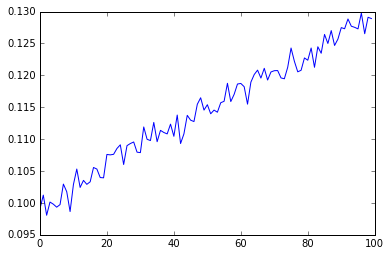

In [24]:

plt.plot(history.history['acc'])
print(max(history.history['acc']))

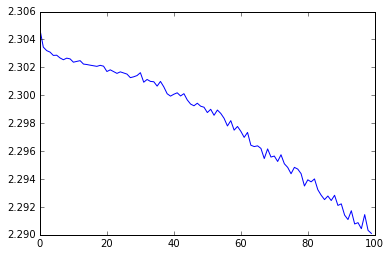

In [25]:
plt.plot(history.history['loss'])


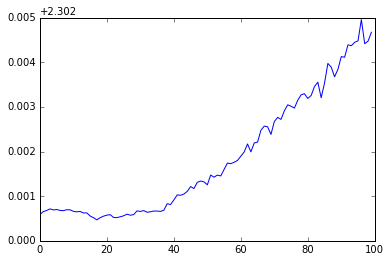

In [26]:
plt.plot(history.history['val_loss'])


0.104


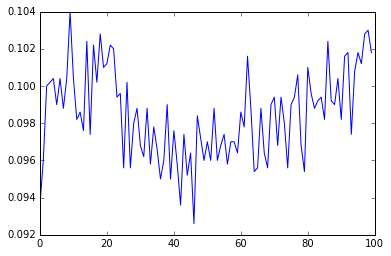

In [27]:
plt.plot(history.history['val_acc'])
print(max(history.history['val_acc']))

In [28]:
test_acc = model.predict_classes(x_test) 
print ('Test accuracy: ', test_acc)
print (test_acc.shape)
# round predictions
#rounded = [round(x) for x in test_acc]
#rounded = np.round(test_acc)
#print(rounded[1])

MemoryError: error freeing device pointer 0x503f50000 (an illegal instruction was encountered)
Apply node that caused the error: GpuReshape{4}(convolution2d_13_b, TensorConstant{[ 1 32  1  1]})
Toposort index: 12
Inputs types: [CudaNdarrayType(float32, vector), TensorType(int64, vector)]
Inputs shapes: [(32,), (4,)]
Inputs strides: [(1,), (8,)]
Inputs values: ['not shown', array([ 1, 32,  1,  1])]
Outputs clients: [[GpuElemwise{Composite{(i0 * ((i1 + i2) + Abs((i1 + i2))))}}[(0, 1)](CudaNdarrayConstant{error while transferring the value: error (an illegal instruction was encountered)copying data to host}, GpuCorrMM{half, (1, 1)}.0, GpuReshape{4}.0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [16]:
print (y_test.shape)
#y_test=to_categorical(y_test)
print (y_test.shape)

(10000,)
(10000,)


In [17]:
num=len(x_test)
r=0
w=0
for i in range(num):
        #print ('y_pred ',test_acc[i])
        #print ('labels ',y_test[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(test_acc[i],y_test[i]):
            r+=1
        else:
            w+=1
print ("tested ",  num, "digits")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")


tested  10000 digits
correct:  1029 wrong:  8971 error rate:  89.71 %
got correctly  10.29 %
